# <font color='Blue'>Deep Learning - Binary Classification</font>

# <font color='Blue'>Classification</font>

Classification is the problem of identifying to which of a set of categories or label, a new observation belongs. Classification of the new observation is on the basis of a training set of data containing observations (or instances) whose category membership is known.

Classification problems are an important category of problems in analytics in which the outcome variable or response variable 
takes discrete values. Primary objective of a classification model is to predict the probability of an observation belonging 
to a class, known as class probability. Few examples of classificiation problems are
  
  1. A bank would like to classify its customers as high-risk and low-risk
  2. E-commerce company would like to predict if a customer would churn or not
  3. Health service provider may like to classify a patient as positive or negative
  4. Predicting whether India will win world-cup or not
  5. Classifying sentiments of customers as positive or negative
  6. Based on image of the plant, predict if the plant is infected with a specific diease or not
  
Classification problems may have binary or multiple outcomes and so are called as binary or multinomial classification. Some
techniques for solving classification problems are logistic regression, decision trees, naive-bayes, support vector machines, 
neural network, kNN etc.
  
We shall discuss logistic regression, decision trees, naive-bayes.

## <font color='Blue'>Learning Objectives</font>
  1. Apply Deepl Learning to a Binary Classification Problem

## <font color='Blue'>Importing Libraries</font>

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [3]:
np.set_printoptions(suppress=True)

### <font color='Blue'>1.0 Dataset </font>

Let us use the German credit rating datasheet available at UCI Machine learning repository to predict whether a credit is a 
good or a bad credit. Credit classification is one of the popular classification problems encountered by financial 
institutions. For example, when a customer applies for a lon, financial institutions such as banks would like to predict the 
probability of default. 

### <font color='Blue'>1.1 Loading Data</font>

In [4]:
credit_df = pd.read_csv( "German Credit Data.csv" )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


Dataset contains 1000 records and 14 columns

There are few categorical columns which are inferred as objects

In [5]:
credit_df.iloc[0:5,0:14]

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


### <font color='Blue'>1.2 Class Variable and Proportions</font>

    Status variable stands for "good credit" or "bad credit"
    Status = 0 - Good Credit
    Status = 1 - Bad Credit
    Proportion of Classes = 70% [0] and 30% [1]

In [6]:
credit_df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

### <font color='Blue'>1.3 Obtaining Indpendent Variables and Encoding Categorical Variables </font>

In [7]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [8]:
encoded_credit_df = pd.get_dummies( credit_df[X_features], drop_first = True )
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

#### Checking some encoded features

In [9]:
encoded_credit_df[['checkin_acc_A12','checkin_acc_A13','checkin_acc_A14']].head(5)

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [10]:
encoded_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1000 non-null   int64
 1   amount                 1000 non-null   int64
 2   inst_rate              1000 non-null   int64
 3   residing_since         1000 non-null   int64
 4   age                    1000 non-null   int64
 5   num_credits            1000 non-null   int64
 6   checkin_acc_A12        1000 non-null   uint8
 7   checkin_acc_A13        1000 non-null   uint8
 8   checkin_acc_A14        1000 non-null   uint8
 9   credit_history_A31     1000 non-null   uint8
 10  credit_history_A32     1000 non-null   uint8
 11  credit_history_A33     1000 non-null   uint8
 12  credit_history_A34     1000 non-null   uint8
 13  savings_acc_A62        1000 non-null   uint8
 14  savings_acc_A63        1000 non-null   uint8
 15  savings_acc_A64        1000 non-null   

In [11]:
Y = credit_df.status
X = encoded_credit_df

### <font color='Blue'>1.4 Splitting into Train and Validation Sets </font>

In [12]:
train_data, test_data, train_targets, test_targets = train_test_split( X , Y, train_size = 0.7, random_state = 42 )

### <font color='Blue'>1.5 Converting Data Frame into Array </font>

#### <font color='Blue'>1.5.1 Converting Train and Test Targets into Array </font>

In [13]:
train_targets = train_targets.to_numpy()
test_targets = test_targets.to_numpy()

In [14]:
train_targets

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [15]:
test_targets

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1], d

#### <font color='Blue'>1.5.2 Converting Train and Test Data into Array </font>

In [16]:
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

In [17]:
train_data.shape

(700, 29)

In [18]:
test_data.shape

(300, 29)

### <font color='Blue'>1.6 Data Normalization </font>

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to 
automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:

In [19]:
mean = train_data.mean(axis=0)
std  = train_data.std(axis=0)

train_data = train_data - mean
train_data = train_data/std

test_data = test_data - mean
test_data = test_data/std

In [20]:
train_data[0]

array([ 0.23101642, -0.46293616,  0.91116369,  1.05738521,  2.17938197,
        0.99779903, -0.62581954, -0.25898489,  1.24316312, -0.2259448 ,
       -1.02020406,  3.12557687, -0.65688115, -0.33597259, -0.2682825 ,
       -0.22941573, -0.47530984, -0.45256964, -0.7063493 , -0.46852129,
        1.73205081, -0.68149479,  0.90453403, -0.31722063, -0.20029696,
        0.4662524 , -0.47530984,  0.76635604, -0.44337478])

In [21]:
test_data[0]

array([-0.27354362, -0.07300748, -0.87793753, -0.75675608, -1.02204185,
       -0.72254413, -0.62581954, -0.25898489, -0.80439967, -0.2259448 ,
        0.98019606, -0.31994094, -0.65688115, -0.33597259, -0.2682825 ,
       -0.22941573, -0.47530984, -0.45256964,  1.41573015, -0.46852129,
       -0.57735027,  1.46736265, -1.1055416 , -0.31722063, -0.20029696,
        0.4662524 , -0.47530984,  0.76635604, -0.44337478])

### <font color='Blue'>1.7 Building (Defining our Network) </font>

<img src="Activation Function Last Layer.jpg" width=800 height = 600>   

In [22]:
from keras import models
from keras import layers

In [23]:
from keras import backend as K
K.clear_session()

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',
                           input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

We need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network 
is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the `binary_crossentropy` loss. 
Crossentropy is a quantity from the field of Information Theory, that measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and our predictions.

Here's the step where we configure our model with the `rmsprop` optimizer and the `binary_crossentropy` loss function. 
Note that we will also monitor accuracy during training.

### <font color='Blue'>1.8 Fitting our Model </font>

In [24]:
hist = model.fit(train_data, train_targets,
                             epochs=100,
                             batch_size=32,verbose=2,
                             validation_data=(test_data, test_targets))

Train on 700 samples, validate on 300 samples
Epoch 1/100
 - 0s - loss: 0.6558 - accuracy: 0.6786 - val_loss: 0.6412 - val_accuracy: 0.6667
Epoch 2/100
 - 0s - loss: 0.6115 - accuracy: 0.7014 - val_loss: 0.6167 - val_accuracy: 0.6667
Epoch 3/100
 - 0s - loss: 0.5845 - accuracy: 0.7186 - val_loss: 0.5982 - val_accuracy: 0.6633
Epoch 4/100
 - 0s - loss: 0.5644 - accuracy: 0.7257 - val_loss: 0.5827 - val_accuracy: 0.6767
Epoch 5/100
 - 0s - loss: 0.5482 - accuracy: 0.7329 - val_loss: 0.5700 - val_accuracy: 0.6800
Epoch 6/100
 - 0s - loss: 0.5336 - accuracy: 0.7414 - val_loss: 0.5588 - val_accuracy: 0.6967
Epoch 7/100
 - 0s - loss: 0.5211 - accuracy: 0.7514 - val_loss: 0.5497 - val_accuracy: 0.7100
Epoch 8/100
 - 0s - loss: 0.5110 - accuracy: 0.7714 - val_loss: 0.5426 - val_accuracy: 0.7133
Epoch 9/100
 - 0s - loss: 0.5011 - accuracy: 0.7700 - val_loss: 0.5356 - val_accuracy: 0.7100
Epoch 10/100
 - 0s - loss: 0.4921 - accuracy: 0.7743 - val_loss: 0.5295 - val_accuracy: 0.7100
Epoch 11/100


Epoch 87/100
 - 0s - loss: 0.2916 - accuracy: 0.8843 - val_loss: 0.5658 - val_accuracy: 0.7333
Epoch 88/100
 - 0s - loss: 0.2910 - accuracy: 0.8871 - val_loss: 0.5670 - val_accuracy: 0.7300
Epoch 89/100
 - 0s - loss: 0.2892 - accuracy: 0.8886 - val_loss: 0.5693 - val_accuracy: 0.7300
Epoch 90/100
 - 0s - loss: 0.2876 - accuracy: 0.8857 - val_loss: 0.5710 - val_accuracy: 0.7300
Epoch 91/100
 - 0s - loss: 0.2860 - accuracy: 0.8857 - val_loss: 0.5728 - val_accuracy: 0.7300
Epoch 92/100
 - 0s - loss: 0.2842 - accuracy: 0.8900 - val_loss: 0.5759 - val_accuracy: 0.7333
Epoch 93/100
 - 0s - loss: 0.2833 - accuracy: 0.8900 - val_loss: 0.5785 - val_accuracy: 0.7333
Epoch 94/100
 - 0s - loss: 0.2816 - accuracy: 0.8843 - val_loss: 0.5796 - val_accuracy: 0.7300
Epoch 95/100
 - 0s - loss: 0.2803 - accuracy: 0.8871 - val_loss: 0.5823 - val_accuracy: 0.7367
Epoch 96/100
 - 0s - loss: 0.2788 - accuracy: 0.8943 - val_loss: 0.5848 - val_accuracy: 0.7367
Epoch 97/100
 - 0s - loss: 0.2764 - accuracy: 0.88

In [25]:
history_dict = hist.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

### <font color='Blue'>1.9 Comparison of Accuracy in Training and Test Data Set </font>

In [26]:
epochs = range(1, 101)
tra_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

tra_loss = hist.history['loss']
val_loss = hist.history['val_loss']

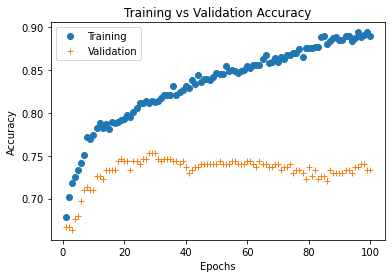

In [27]:
plt.plot(epochs, tra_acc, 'o', label='Training')
plt.plot(epochs, val_acc, '+', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

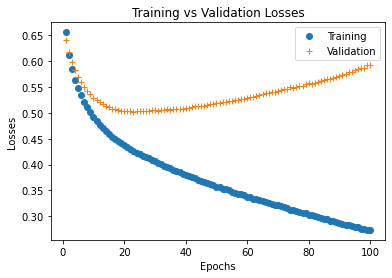

In [28]:
plt.plot(epochs, tra_loss, 'o', label='Training')
plt.plot(epochs, val_loss, '+', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Training vs Validation Losses')
plt.legend()
plt.show()

### <font color='Blue'>What Should you do ?</font>

Let us Experiment. You will guide me. Try a Different Architecture. Different Optimizer ?

### <font color='Blue'>1.10 Extracting Predicted Probabilities </font>

In [29]:
pred_probs=model.predict(test_data)
predicted_prob=pd.DataFrame(pred_probs)

In [30]:
y_pred_df = pd.DataFrame( { "actual": test_targets, "predicted_prob":predicted_prob[0]
                          } )
y_pred_df

,actual,predicted_prob
0,1,0.485388
1,0,0.792686
2,0,0.820211
3,0,0.243997
4,0,0.008544
...,...,...
295,0,0.010977
296,1,0.316060
297,0,0.140617
298,0,0.947793


### <font color='Blue'>1.11 Classifier Performance </font>

<b> RoC Curve </b>

RoC Curve can be used to understand the overall performance of the classifier and used for model selection. <br>
RoC Curve is a plot between False positive rate [FP / (TN + FP)] and True positive rate [TP / (TP+FN)] <br>

Higher the AUC, better the model <br>
AUC < 0.5 model is inferior to a case of having no model <br>
AUC > 0.7 model is useful

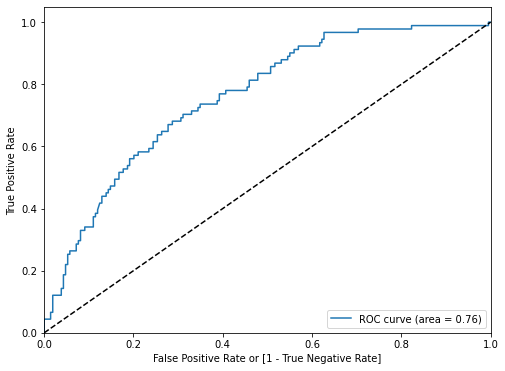

auc_score: 0.76


In [31]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 2 ))

### <font color='Blue'>1.12 Choosing a threshold </font>

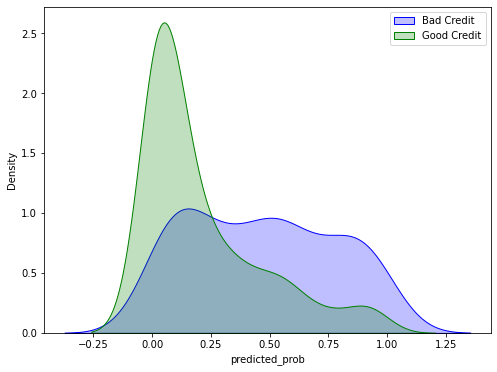

In [32]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Bad Credit' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Good Credit' )
plt.legend()
plt.show()

### <font color='Blue'>1.13 Performance Measures from Confusion Matrix </font>

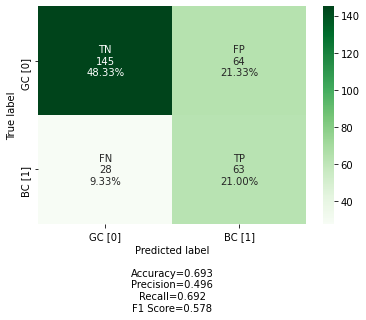

In [33]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.25 else 0)
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [34]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       209
           1       0.50      0.69      0.58        91

    accuracy                           0.69       300
   macro avg       0.67      0.69      0.67       300
weighted avg       0.73      0.69      0.70       300



### <font color='Blue'>Conclusion</font>

Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural 
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will 
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data 
never-seen-before. Make sure to always monitor performance on data that is outside of the training set.

### <font color='Blue'>Feature Importance Using Shap</font>

For information of Shapley Values, See: https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30

In [36]:
#Run pip install shap before importing shap
import shap

In [37]:
explainer = shap.KernelExplainer(model.predict,train_data)

In [38]:
shap_values = explainer.shap_values(test_data,nsamples=300)

  0%|          | 0/300 [00:00<?, ?it/s]

In [41]:
features = encoded_credit_df.columns
features

Index(['duration', 'amount', 'inst_rate', 'residing_since', 'age',
       'num_credits', 'checkin_acc_A12', 'checkin_acc_A13', 'checkin_acc_A14',
       'credit_history_A31', 'credit_history_A32', 'credit_history_A33',
       'credit_history_A34', 'savings_acc_A62', 'savings_acc_A63',
       'savings_acc_A64', 'savings_acc_A65', 'present_emp_since_A72',
       'present_emp_since_A73', 'present_emp_since_A74',
       'present_emp_since_A75', 'personal_status_A92', 'personal_status_A93',
       'personal_status_A94', 'inst_plans_A142', 'inst_plans_A143', 'job_A172',
       'job_A173', 'job_A174'],
      dtype='object')

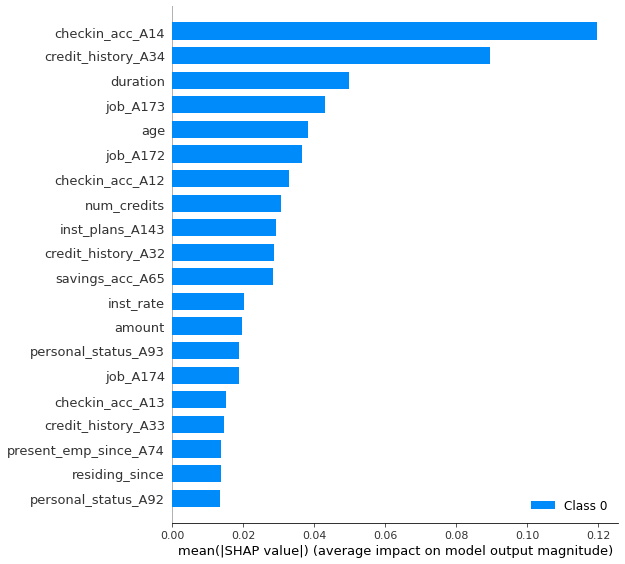

In [40]:
shap.summary_plot(shap_values,test_data,feature_names=encoded_credit_df.columns)

Each point of every row is a record of the test dataset. The features are sorted from the most important one to the less important. 